In [1]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd 

In [5]:
#/Users/laurabraadrasmussen/Documents/UNI/5. semester/Deep Learning/Projekt/Data
train_data = pd.read_csv('../Data/training.csv')
test_data = pd.read_csv('../Data/test.csv')
id_lookup_data = pd.read_csv('../Data/IdLookupTable.csv')

#test hello ndig der

In [3]:
train_data.iloc[1]

left_eye_center_x                                                    64.332936
left_eye_center_y                                                    34.970077
right_eye_center_x                                                   29.949277
right_eye_center_y                                                   33.448715
left_eye_inner_corner_x                                               58.85617
left_eye_inner_corner_y                                              35.274349
left_eye_outer_corner_x                                              70.722723
left_eye_outer_corner_y                                              36.187166
right_eye_inner_corner_x                                             36.034723
right_eye_inner_corner_y                                             34.361532
right_eye_outer_corner_x                                             24.472511
right_eye_outer_corner_y                                             33.144443
left_eyebrow_inner_end_x                            

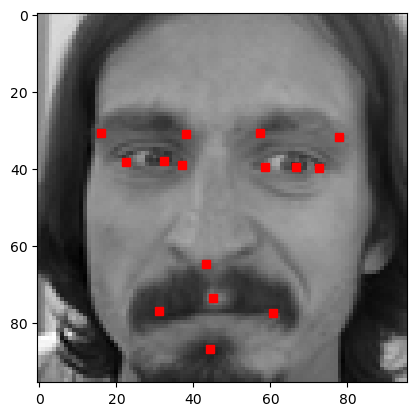

In [4]:
def get_image_and_keypoints(series):
    image = series['Image']
    image = np.fromstring(image, sep=' ').reshape([96, 96]) / 255.0
    keypoints = pd.DataFrame(series).drop(['Image'], axis=0).values.reshape([15, 2])
    return image, keypoints


def get_image_and_keypoints_by_id(train_data, id):
    series = train_data.iloc[id]
    return get_image_and_keypoints(series)


def show_image_with_keypoints(series):
    image, keypoints = get_image_and_keypoints(series)
    plt.imshow(image, cmap='gray')
    plt.plot(keypoints[:, 0], keypoints[:, 1], 'rs')


def show_image_with_keypoints_by_id(train_data, id):
    series = train_data.iloc[id]
    show_image_with_keypoints(series)
    
show_image_with_keypoints_by_id(train_data, 4)